<a href="https://colab.research.google.com/github/karthicsalem/Mysql/blob/master/CSE18231_LABEval_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing packages

In [91]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import mode

In [ ]:
sns.set_style('white')
sns.set_style('ticks')

# 1)Reading Data

In [92]:
dat=df=pd.read_csv('https://raw.githubusercontent.com/karthicsalem/data/master/heart.csv')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [94]:
df.shape

(303, 14)

# 2)Checking for null values

In [95]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## There are no null values.Therefore we will randomly replace with null values

In [96]:
dat = dat.stack().sample(frac=0.95).unstack()
dat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,NaN,2.0,0.0,2.0,1.0
3,56.0,1.0,NaN,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,NaN,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


In [97]:
dat.isnull().sum()

age         14
sex         19
cp          20
trestbps    13
chol         7
fbs         17
restecg     18
thalach     20
exang       10
oldpeak     10
slope       19
ca          20
thal        13
target      12
dtype: int64

In [98]:
dat.nunique()

age          41
sex           2
cp            4
trestbps     48
chol        149
fbs           2
restecg       3
thalach      88
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

## 3)Filling null values

In [99]:
dat['age'].fillna(dat['age'].mean(),inplace=True)

In [100]:
dat.isnull().sum()

age          0
sex         19
cp          20
trestbps    13
chol         7
fbs         17
restecg     18
thalach     20
exang       10
oldpeak     10
slope       19
ca          20
thal        13
target      12
dtype: int64

In [102]:
dat['sex'].fillna(dat['sex'].mode()[0],inplace=True)
dat['cp'].fillna(dat['cp'].mode()[0],inplace=True)
dat['fbs'].fillna(dat['fbs'].mode()[0],inplace=True)
dat['restecg'].fillna(dat['restecg'].mode()[0],inplace=True)
dat['exang'].fillna(dat['exang'].mode()[0],inplace=True)
dat['slope'].fillna(dat['slope'].mode()[0],inplace=True)
dat['ca'].fillna(dat['ca'].mode()[0],inplace=True)
dat['thal'].fillna(dat['thal'].mode()[0],inplace=True)
dat['target'].fillna(dat['target'].mode()[0],inplace=True)

In [103]:
dat.isnull().sum()

age          0
sex          0
cp           0
trestbps    13
chol         7
fbs          0
restecg      0
thalach     20
exang        0
oldpeak     10
slope        0
ca           0
thal         0
target       0
dtype: int64

In [104]:
dat['trestbps'].fillna(dat['trestbps'].mean(),inplace=True)
dat['chol'].fillna(dat['chol'].mean(),inplace=True)
dat['thalach'].fillna(dat['thalach'].mean(),inplace=True)
dat['oldpeak'].fillna(dat['oldpeak'].mean(),inplace=True)

In [105]:
dat.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 4) Central Tendencies

In [150]:
tempdf=df.describe()
dft = pd.DataFrame(df.quantile(0.75)-df.quantile(0.25)).transpose()
dft.rename(index={0:'Interquartile Range'},inplace=True)
dfr=pd.DataFrame(df.max()-df.min()).transpose()
dfr.rename(index={0:'Range'},inplace=True)
dfm=df.mode().drop(index=1)
dfm.rename(index={0:'Mode'},inplace=True)
tempdf=pd.concat([tempdf,dft],axis=0)
tempdf=pd.concat([tempdf,dfr],axis=0)
tempdf=pd.concat([tempdf,dfm],axis=0)
tempdf.rename(index={'50%':'Median'},inplace=True)
tempdf.rename(index={'std':'Standard Deviation'},inplace=True)
tempdf.drop(index=['count','min','25%','75%','max',2],inplace=True)
tempdf

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
Standard Deviation,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
Median,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
Interquartile Range,13.500000,1.000000,2.000000,20.000000,63.500000,0.000000,1.000000,32.500000,1.000000,1.600000,1.000000,1.000000,1.000000,1.000000
Range,48.000000,1.000000,3.000000,106.000000,438.000000,1.000000,2.000000,131.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000
Mode,58.000000,1.000000,0.000000,120.000000,197.000000,0.000000,1.000000,162.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1.000000


## 5)Dividing into Categories
### Divinding According to Target (1-No disease ,0-Yes)

In [152]:
gs=df.groupby('target')

In [153]:
df1=gs.get_group(1.0)
df1.reset_index(inplace=True)
df1=df1.drop(columns=['index'])
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [154]:
df2=gs.get_group(0.0)
df2.reset_index(inplace=True)
df2=df2.drop(columns=['index'])
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
1,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
2,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
3,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
4,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [156]:
tempdf=df1.describe()
dft = pd.DataFrame(df1.quantile(0.75)-df1.quantile(0.25)).transpose()
dft.rename(index={0:'Interquartile Range'},inplace=True)
dfr=pd.DataFrame(df1.max()-df1.min()).transpose()
dfr.rename(index={0:'Range'},inplace=True)
dfm=df1.mode().drop(index=1)
dfm.rename(index={0:'Mode'},inplace=True)
tempdf=pd.concat([tempdf,dft],axis=0)
tempdf=pd.concat([tempdf,dfr],axis=0)
tempdf=pd.concat([tempdf,dfm],axis=0)
tempdf.rename(index={'50%':'Median'},inplace=True)
tempdf.rename(index={'std':'Standard Deviation'},inplace=True)
tempdf.drop(index=['count','min','25%','75%','max',2,3,4,5],inplace=True)
tempdf

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
Standard Deviation,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
Median,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
Interquartile Range,15.000000,1.000000,1.000000,20.000000,59.000000,0.000000,1.000000,23.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0
Range,47.000000,1.000000,3.000000,86.000000,438.000000,1.000000,2.000000,106.000000,1.000000,4.200000,2.000000,4.000000,3.000000,0.0
Mode,54.000000,1.000000,2.000000,120.000000,197.000000,0.000000,1.000000,162.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1.0


In [158]:
tempdf=df2.describe()
dft = pd.DataFrame(df2.quantile(0.75)-df2.quantile(0.25)).transpose()
dft.rename(index={0:'Interquartile Range'},inplace=True)
dfr=pd.DataFrame(df2.max()-df2.min()).transpose()
dfr.rename(index={0:'Range'},inplace=True)
dfm=df2.mode().drop(index=1)
dfm.rename(index={0:'Mode'},inplace=True)
tempdf=pd.concat([tempdf,dft],axis=0)
tempdf=pd.concat([tempdf,dfr],axis=0)
tempdf=pd.concat([tempdf,dfm],axis=0)
tempdf.rename(index={'50%':'Median'},inplace=True)
tempdf.rename(index={'std':'Standard Deviation'},inplace=True)
tempdf.drop(index=['count','min','25%','75%','max',2],inplace=True)
tempdf

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
Standard Deviation,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
Median,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
Interquartile Range,10.000000,0.000000,0.000000,24.750000,65.750000,0.000000,1.000000,31.000000,1.000000,1.900000,0.750000,2.000000,1.000000,0.0
Range,42.000000,1.000000,3.000000,100.000000,278.000000,1.000000,2.000000,124.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0
Mode,58.000000,1.000000,0.000000,140.000000,212.000000,0.000000,0.000000,132.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.0


# Comparing Step-4 and Step-6, We see that
*   Average age is higher for people with heart disease. 
*   Cholestrol is higher for  people with heart disease
*   Resting Blood pressure  is higher for  people with heart disease







## 8 , 9 , 10) plots and inference

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


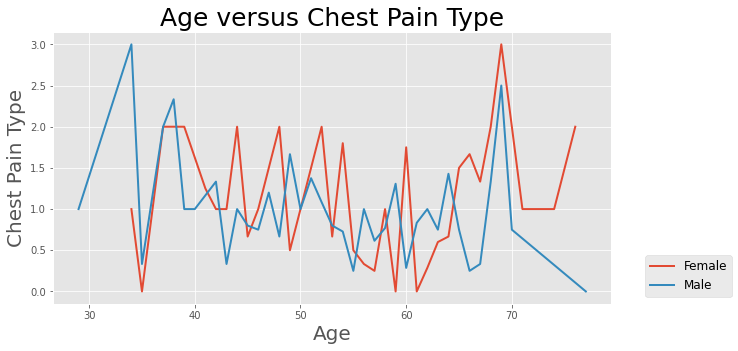

In [160]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
sns.lineplot(df["age"],df['cp'],linewidth=2,hue=df['sex'],ci=None)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Chest Pain Type",fontsize=20)
plt.title("Age versus Chest Pain Type",fontsize=25)
plt.legend(labels=['Female','Male'],frameon=True,fontsize='large',bbox_to_anchor=(1.05, 0.2),loc=2);

### We can see that


*   Younger men(30s) and both mean and women in late 60s tend to have type-3 chest pain.
*   Younger women(35-40) have type 0 chest pain.
*   People between 40-60 mostly have type 1 or 2 pain.





/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


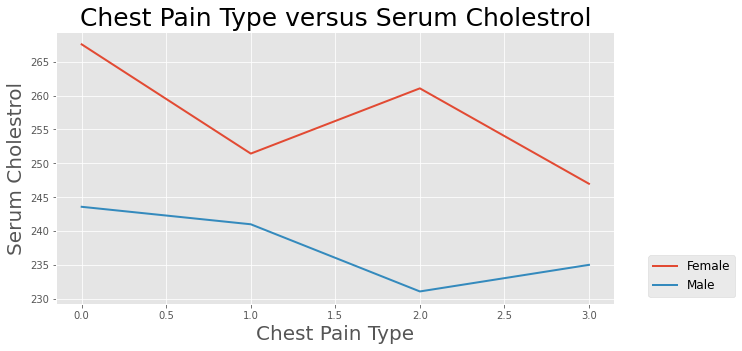

In [118]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
sns.lineplot(df["cp"],df['chol'],linewidth=2,hue=df['sex'],ci=None)
plt.xlabel("Chest Pain Type",fontsize=20)
plt.ylabel("Serum Cholestrol",fontsize=20)
plt.title("Chest Pain Type versus Serum Cholestrol",fontsize=25)
plt.legend(labels=['Female','Male'],frameon=True,fontsize='large',bbox_to_anchor=(1.05, 0.2),loc=2);

### We conclude that
*   Women have higher cholestrol in General and Men lower compared to women
*   People with Type-1 chest pain have cholestrol value between 240-260







/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


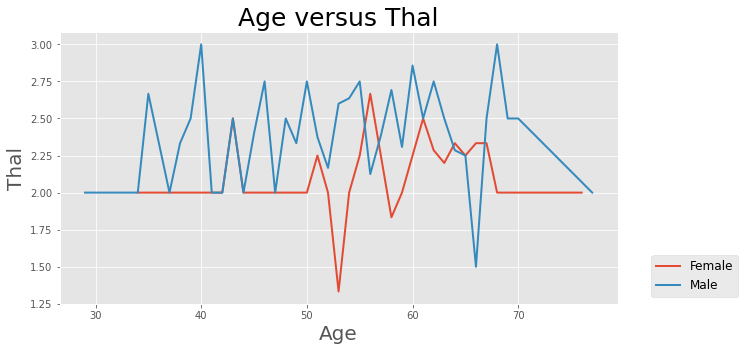

In [162]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
sns.lineplot(df["age"],df['thal'],linewidth=2,hue=df['sex'],ci=None)
#sns.swarmplot(df['thal'],df['age'],hue=df['sex'])
plt.xlabel("Age",fontsize=20)
plt.ylabel("Thal",fontsize=20)
plt.title("Age versus Thal",fontsize=25)
plt.legend(labels=['Female','Male'],frameon=True,fontsize='large',bbox_to_anchor=(1.05, 0.2),loc=2);

### This data is not labelled properly. Therefore we dont draw any conclusions from here

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


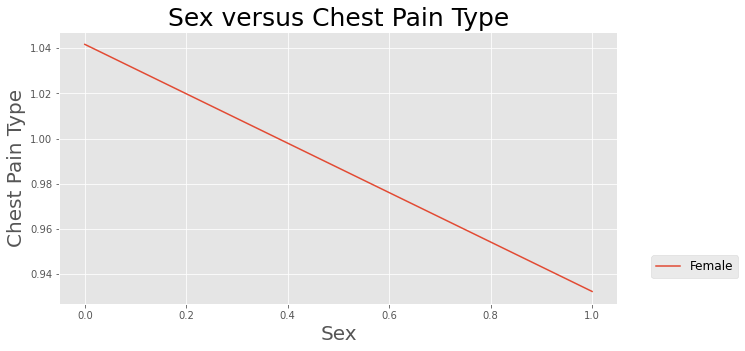

In [169]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
sns.lineplot(df['sex'],df['cp'],ci=None)
plt.xlabel("Sex",fontsize=20)
plt.ylabel("Chest Pain Type",fontsize=20)
plt.title("Sex versus Chest Pain Type",fontsize=25)
plt.legend(labels=['Female','Male'],frameon=True,fontsize='large',bbox_to_anchor=(1.05, 0.2),loc=2);

### This plot does not give any conculsion. Therefore we'll try countplot for the same values.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


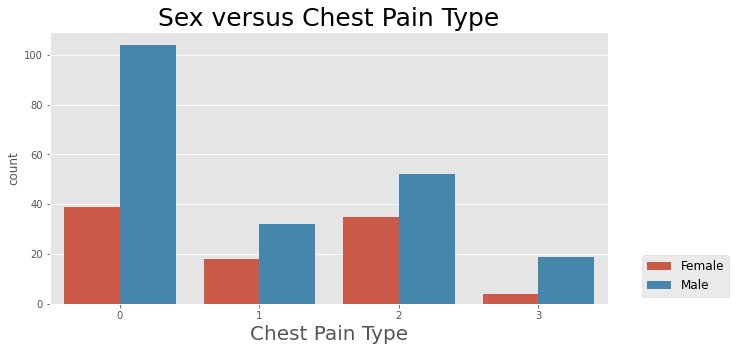

In [168]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
sns.countplot(df['cp'],linewidth=2,hue=df['sex'])
plt.xlabel("Chest Pain Type",fontsize=20)
plt.title("Sex versus Chest Pain Type",fontsize=25)
plt.legend(labels=['Female','Male'],frameon=True,fontsize='large',bbox_to_anchor=(1.05, 0.2),loc=2);

### We conclude that
*   More men than women have chest pain.
*   Most people have Type-0 chest pain and Least have Type-3 chest pain.


